In [1]:
import sys
sys.path.insert(0,'..')

from sklearn.preprocessing import MinMaxScaler
from timeit import default_timer as timer
from matrixMath import Knotilus
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [26]:
df = pd.DataFrame(np.arange(5)+1)

In [27]:
print(df.to_latex())

\begin{tabular}{lr}
\toprule
{} &  0 \\
\midrule
0 &  1 \\
1 &  2 \\
2 &  3 \\
3 &  4 \\
4 &  5 \\
\bottomrule
\end{tabular}



In [21]:
model = Knotilus(df[0], df[0])

In [23]:
model.alpha = 1e-8
model.useMax = True
model.numKnots = 3
df = pd.DataFrame(model.CreateKnots(np.array(df[0]), [0, 2, 4]))

In [25]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &    0 &    1 &    2 \\
\midrule
0 &  1.0 &  0.0 &  0.0 \\
1 &  2.0 &  0.0 &  0.0 \\
2 &  3.0 &  1.0 &  0.0 \\
3 &  4.0 &  2.0 &  0.0 \\
4 &  5.0 &  3.0 &  1.0 \\
\bottomrule
\end{tabular}



Knot: 2   Iteration: 36   Error: 12.20288789147393

Time: 0.12155192899990652


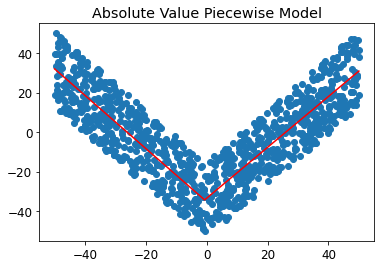

In [50]:
df = pd.read_csv('../data/pw_data1_1000.csv')
ss  = MinMaxScaler()
foo = ss.fit_transform(df)
foo = pd.DataFrame(foo)

start = timer()
model = Knotilus(foo[0], foo[1])
model = model.fit(numKnots=2, verbose=True, alpha=1e-8, logging=True)
end = timer()

print('\n\nTime:', end - start)
# knotVals = np.sort(model.results.x[-1 * (model.numKnots+1):])
# for knot in knotVals:
#     print('Knot:', knot)

foo[0] = (foo[0] * 100) - 50
foo[1] = (foo[1] * 100) - 50

plt.scatter(foo[0], foo[1])
plt.plot(foo[0], (model.predict() * 100) - 50, 'r')

plt.title('Absolute Value Piecewise Model')
plt.rcParams.update({'font.size': 12})

plt.savefig('../visualizations/absolute_val', dpi=300)

In [51]:
def SofterMax(alpha, x):
    if x > 0 and x <= alpha:
        return round(3 * alpha**(-4) * x**5 - 8 * alpha**(-3) * x**4 + 6 * alpha**(-2) * x**3, 8)
    elif x > alpha:
        return x
    else:
        return 0

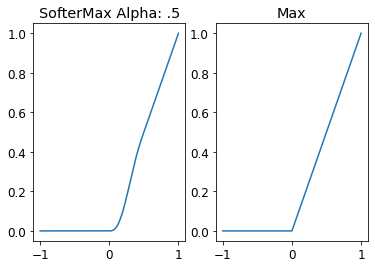

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)

foo = np.linspace(-1,1,500)
SofterMaxVec = np.vectorize(SofterMax, otypes=[np.float64])

ax1.set_title('SofterMax Alpha: .5')
ax1.plot(foo, SofterMaxVec(.5, foo))
ax2.set_title('Max')
ax2.plot(foo, np.maximum(foo, 0))
plt.rcParams.update({'font.size': 12})
plt.savefig('../visualizations/soft_max_comp', dpi=300)